In [68]:
import numpy as np

from default import PROJECT_HOME
%cd {PROJECT_HOME}

/Users/aflamant/Documents/courses/2024-2025/mémoire/03-code/memoire


In [79]:
from dataset import FixedPrattTrussDatasetSingleTarget, FixedPrattTrussDataset
import torch
import numpy as np

#ds = FixedPrattTrussDatasetSingleTarget('data/dataset/pratt_truss_bridge_bak/single_ea/train_128.hdf5')
ds = FixedPrattTrussDataset("data/dataset/pratt_truss_bridge/multiple_ea/train_16384.hdf5")

In [88]:
def pratt_stiffness_matrix(H: float, L: float, EA: torch.DoubleTensor):
    H2 = H ** 2
    L2 = L ** 2
    D2_3_2 = (H ** 2 + L ** 2) ** (3 / 2)
    HL = H * L

    EA_L = EA / L
    EA_H = EA / H

    EA_L2_D2_3_2 = EA * L2 / D2_3_2
    EA_HL_D2_3_2 = EA * HL / D2_3_2
    EA_H2_D2_3_2 = EA * H2 / D2_3_2

    k = torch.eye(32).repeat((len(EA), 1, 1))

    k[:, 2, 2] = EA_L[:, 0] + EA_L[:, 1]
    k[:, 2, 4] = -EA_L[:, 1]
    k[:, 3, 3] = EA_H[:, 14]
    k[:, 3, 31] = -EA_H[:, 14]
    k[:, 4, 2] = -EA_L[:, 1]
    k[:, 4, 4] = EA_L[:, 1] + EA_L[:, 2] + EA_L2_D2_3_2[:, 22]
    k[:, 4, 5] = -EA_HL_D2_3_2[:, 22]
    k[:, 4, 6] = -EA_L[:, 2]
    k[:, 4, 30] = -EA_L2_D2_3_2[:, 22]
    k[:, 4, 31] = EA_HL_D2_3_2[:, 22]
    k[:, 5, 4] = -EA_HL_D2_3_2[:, 22]
    k[:, 5, 5] = EA_H[:, 15] + EA_H2_D2_3_2[:, 22]
    k[:, 5, 29] = -EA_H[:, 15]
    k[:, 5, 30] = EA_HL_D2_3_2[:, 22]
    k[:, 5, 31] = -EA_H2_D2_3_2[:, 22]
    k[:, 6, 4] = -EA_L[:, 2]
    k[:, 6, 6] = EA_L[:, 2] + EA_L[:, 3] + EA_L2_D2_3_2[:, 23]
    k[:, 6, 7] = -EA_HL_D2_3_2[:, 23]
    k[:, 6, 8] = -EA_L[:, 3]
    k[:, 6, 28] = -EA_L2_D2_3_2[:, 23]
    k[:, 6, 29] = EA_HL_D2_3_2[:, 23]
    k[:, 7, 6] = -EA_HL_D2_3_2[:, 23]
    k[:, 7, 7] = EA_H[:, 16] + EA_H2_D2_3_2[:, 23]
    k[:, 7, 27] = -EA_H[:, 16]
    k[:, 7, 28] = EA_HL_D2_3_2[:, 23]
    k[:, 7, 29] = -EA_H2_D2_3_2[:, 23]
    k[:, 8, 6] = -EA_L[:, 3]
    k[:, 8, 8] = EA_L[:, 3] + EA_L[:, 4] + EA_L2_D2_3_2[:, 24] + EA_L2_D2_3_2[:, 25]
    k[:, 8, 9] = -EA_HL_D2_3_2[:, 24] + EA_HL_D2_3_2[:, 25]
    k[:, 8, 10] = -EA_L[:, 4]
    k[:, 8, 22] = -EA_L2_D2_3_2[:, 25]
    k[:, 8, 23] = -EA_HL_D2_3_2[:, 25]
    k[:, 8, 26] = -EA_L2_D2_3_2[:, 24]
    k[:, 8, 27] = EA_HL_D2_3_2[:, 24]
    k[:, 9, 8] = -EA_HL_D2_3_2[:, 24] + EA_HL_D2_3_2[:, 25]
    k[:, 9, 9] = EA_H[:, 17] + EA_H2_D2_3_2[:, 24] + EA_H2_D2_3_2[:, 25]
    k[:, 9, 22] = -EA_HL_D2_3_2[:, 25]
    k[:, 9, 23] = -EA_H2_D2_3_2[:, 25]
    k[:, 9, 25] = -EA_H[:, 17]
    k[:, 9, 26] = EA_HL_D2_3_2[:, 24]
    k[:, 9, 27] = -EA_H2_D2_3_2[:, 24]
    k[:, 10, 8] = -EA_L[:, 4]
    k[:, 10, 10] = EA_L[:, 4] + EA_L[:, 5] + EA_L2_D2_3_2[:, 26]
    k[:, 10, 11] = EA_HL_D2_3_2[:, 26]
    k[:, 10, 12] = -EA_L[:, 5]
    k[:, 10, 20] = -EA_L2_D2_3_2[:, 26]
    k[:, 10, 21] = -EA_HL_D2_3_2[:, 26]
    k[:, 11, 10] = EA_HL_D2_3_2[:, 26]
    k[:, 11, 11] = EA_H[:, 18] + EA_H2_D2_3_2[:, 26]
    k[:, 11, 20] = -EA_HL_D2_3_2[:, 26]
    k[:, 11, 21] = -EA_H2_D2_3_2[:, 26]
    k[:, 11, 23] = -EA_H[:, 18]
    k[:, 12, 10] = -EA_L[:, 5]
    k[:, 12, 12] = EA_L[:, 5] + EA_L[:, 6] + EA_L2_D2_3_2[:, 27]
    k[:, 12, 13] = EA_HL_D2_3_2[:, 27]
    k[:, 12, 14] = -EA_L[:, 6]
    k[:, 12, 18] = -EA_L2_D2_3_2[:, 27]
    k[:, 12, 19] = -EA_HL_D2_3_2[:, 27]
    k[:, 13, 12] = EA_HL_D2_3_2[:, 27]
    k[:, 13, 13] = EA_H[:, 19] + EA_H2_D2_3_2[:, 27]
    k[:, 13, 18] = -EA_HL_D2_3_2[:, 27]
    k[:, 13, 19] = -EA_H2_D2_3_2[:, 27]
    k[:, 13, 21] = -EA_H[:, 19]
    k[:, 14, 12] = -EA_L[:, 6]
    k[:, 14, 14] = EA_L[:, 6] + EA_L[:, 7]
    k[:, 14, 16] = -EA_L[:, 7]
    k[:, 15, 15] = EA_H[:, 20]
    k[:, 15, 19] = -EA_H[:, 20]
    k[:, 16, 14] = -EA_L[:, 7]
    k[:, 16, 16] = EA_L[:, 7] + EA_L2_D2_3_2[:, 28]
    k[:, 16, 18] = -EA_L2_D2_3_2[:, 28]
    k[:, 16, 19] = EA_HL_D2_3_2[:, 28]
    k[:, 18, 12] = -EA_L2_D2_3_2[:, 27]
    k[:, 18, 13] = -EA_HL_D2_3_2[:, 27]
    k[:, 18, 16] = -EA_L2_D2_3_2[:, 28]
    k[:, 18, 18] = EA_L[:, 8] + EA_L2_D2_3_2[:, 27] + EA_L2_D2_3_2[:, 28]
    k[:, 18, 19] = EA_HL_D2_3_2[:, 27] - EA_HL_D2_3_2[:, 28]
    k[:, 18, 20] = -EA_L[:, 8]
    k[:, 19, 12] = -EA_HL_D2_3_2[:, 27]
    k[:, 19, 13] = -EA_H2_D2_3_2[:, 27]
    k[:, 19, 15] = -EA_H[:, 20]
    k[:, 19, 16] = EA_HL_D2_3_2[:, 28]
    k[:, 19, 18] = EA_HL_D2_3_2[:, 27] - EA_HL_D2_3_2[:, 28]
    k[:, 19, 19] = EA_H[:, 20] + EA_H2_D2_3_2[:, 27] + EA_H2_D2_3_2[:, 28]
    k[:, 20, 10] = -EA_L2_D2_3_2[:, 26]
    k[:, 20, 11] = -EA_HL_D2_3_2[:, 26]
    k[:, 20, 18] = -EA_L[:, 8]
    k[:, 20, 20] = EA_L[:, 8] + EA_L[:, 9] + EA_L2_D2_3_2[:, 26]
    k[:, 20, 21] = EA_HL_D2_3_2[:, 26]
    k[:, 20, 22] = -EA_L[:, 9]
    k[:, 21, 10] = -EA_HL_D2_3_2[:, 26]
    k[:, 21, 11] = -EA_H2_D2_3_2[:, 26]
    k[:, 21, 13] = -EA_H[:, 19]
    k[:, 21, 20] = EA_HL_D2_3_2[:, 26]
    k[:, 21, 21] = EA_H[:, 19] + EA_H2_D2_3_2[:, 26]
    k[:, 22, 8] = -EA_L2_D2_3_2[:, 25]
    k[:, 22, 9] = -EA_HL_D2_3_2[:, 25]
    k[:, 22, 20] = -EA_L[:, 9]
    k[:, 22, 22] = EA_L[:, 9] + EA_L[:, 10] + EA_L2_D2_3_2[:, 25]
    k[:, 22, 23] = EA_HL_D2_3_2[:, 25]
    k[:, 22, 24] = -EA_L[:, 10]
    k[:, 23, 8] = -EA_HL_D2_3_2[:, 25]
    k[:, 23, 9] = -EA_H2_D2_3_2[:, 25]
    k[:, 23, 11] = -EA_H[:, 18]
    k[:, 23, 22] = EA_HL_D2_3_2[:, 25]
    k[:, 23, 23] = EA_H[:, 18] + EA_H2_D2_3_2[:, 25]
    k[:, 24, 22] = -EA_L[:, 10]
    k[:, 24, 24] = EA_L[:, 10] + EA_L[:, 11]
    k[:, 24, 26] = -EA_L[:, 11]
    k[:, 25, 9] = -EA_H[:, 17]
    k[:, 25, 25] = EA_H[:, 17]
    k[:, 26, 8] = -EA_L2_D2_3_2[:, 24]
    k[:, 26, 9] = EA_HL_D2_3_2[:, 24]
    k[:, 26, 24] = -EA_L[:, 11]
    k[:, 26, 26] = EA_L[:, 11] + EA_L[:, 12] + EA_L2_D2_3_2[:, 24]
    k[:, 26, 27] = -EA_HL_D2_3_2[:, 24]
    k[:, 26, 28] = -EA_L[:, 12]
    k[:, 27, 7] = -EA_H[:, 16]
    k[:, 27, 8] = EA_HL_D2_3_2[:, 24]
    k[:, 27, 9] = -EA_H2_D2_3_2[:, 24]
    k[:, 27, 26] = -EA_HL_D2_3_2[:, 24]
    k[:, 27, 27] = EA_H[:, 16] + EA_H2_D2_3_2[:, 24]
    k[:, 28, 6] = -EA_L2_D2_3_2[:, 23]
    k[:, 28, 7] = EA_HL_D2_3_2[:, 23]
    k[:, 28, 26] = -EA_L[:, 12]
    k[:, 28, 28] = EA_L[:, 12] + EA_L[:, 13] + EA_L2_D2_3_2[:, 23]
    k[:, 28, 29] = -EA_HL_D2_3_2[:, 23]
    k[:, 28, 30] = -EA_L[:, 13]
    k[:, 29, 5] = -EA_H[:, 15]
    k[:, 29, 6] = EA_HL_D2_3_2[:, 23]
    k[:, 29, 7] = -EA_H2_D2_3_2[:, 23]
    k[:, 29, 28] = -EA_HL_D2_3_2[:, 23]
    k[:, 29, 29] = EA_H[:, 15] + EA_H2_D2_3_2[:, 23]
    k[:, 30, 4] = -EA_L2_D2_3_2[:, 22]
    k[:, 30, 5] = EA_HL_D2_3_2[:, 22]
    k[:, 30, 28] = -EA_L[:, 13]
    k[:, 30, 30] = EA_L[:, 13] + EA_L2_D2_3_2[:, 21] + EA_L2_D2_3_2[:, 22]
    k[:, 30, 31] = EA_HL_D2_3_2[:, 21] - EA_HL_D2_3_2[:, 22]
    k[:, 31, 3] = -EA_H[:, 14]
    k[:, 31, 4] = EA_HL_D2_3_2[:, 22]
    k[:, 31, 5] = -EA_H2_D2_3_2[:, 22]
    k[:, 31, 30] = EA_HL_D2_3_2[:, 21] - EA_HL_D2_3_2[:, 22]
    k[:, 31, 31] = EA_H[:, 14] + EA_H2_D2_3_2[:, 21] + EA_H2_D2_3_2[:, 22]

    return k

In [81]:
size = 10_000
dl = torch.utils.data.DataLoader(ds, batch_size=size, shuffle=False)
x, ea, _, u, q = dl.__iter__().__next__()
ea = ea.expand(-1, 29).to('mps')
k_s = (int(ds.stiffness_matrix[0].__len__() ** .5),) * 2
k = torch.tensor(ds.stiffness_matrix[:size].reshape((-1, *k_s)))
k[k.abs() < .99] = 0.0

In [82]:
(k - pratt_stiffness_matrix(7.5, 7.5, ea)).abs().mean()/k.abs().mean()

tensor(3.3369e-08, dtype=torch.float64)

In [12]:
def f(n):
    k_s = (int(ds.stiffness_matrix[n].__len__() ** .5),) * 2
    k = ds.stiffness_matrix[n].reshape(k_s)
    u = ds.nodes_displacement[n].reshape((-1, 1))
    q = ds.load[n].reshape((-1, 1))

    q_p = np.round(k @ u - q)
    q_p[[1, 17], 0] = 0.
    return q_p


r = f(0)
for i in range(1, 12):
    r += f(i)
r

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.]])

In [13]:
def g(n):
    k_s = (int(ds.stiffness_matrix[n].__len__() ** .5),) * 2
    k = ds.stiffness_matrix[n].reshape(k_s).astype(np.float64)
    k /= ds[n][1]
    k[[0, 1, 17], [0, 1, 17]] = 1
    #k[k.abs() < 1e-9] = 0
    return k

In [14]:
def u_from_x(x, n_panels=8):
    batch_size = len(x)
    u = torch.zeros((batch_size, 4 * n_panels))
    u[:, 2:2 * n_panels + 1] = x[:, :2 * (n_panels - 1) + 1]
    u[:, 2 * (n_panels + 1):] = x[:, 2 * (n_panels - 1) + 1:4 * n_panels - 3]
    return u.unsqueeze(-1)


def q_from_x_q(x, q, n_panels=8):
    q = q.squeeze(-1)
    q[:, np.arange(3, 2 * n_panels, 2)] = x[:, 4 * n_panels - 3: 5 * n_panels - 4]

    return q.unsqueeze(-1)

In [17]:
k_ref = g(0)[0]
k_ref = torch.unsqueeze(k_ref, 0).to(torch.float)

In [19]:
k_ref[0]

tensor([[ 1.0000e+00,  0.0000e+00,  0.0000e+00,  ...,  0.0000e+00,
          0.0000e+00,  0.0000e+00],
        [ 0.0000e+00,  1.0000e+00,  0.0000e+00,  ...,  0.0000e+00,
          0.0000e+00,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00,  2.6667e-01,  ...,  0.0000e+00,
         -4.9992e-34, -8.1643e-18],
        ...,
        [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  ...,  1.8047e-01,
          1.6329e-17, -1.9997e-33],
        [ 0.0000e+00,  0.0000e+00, -4.9992e-34,  ...,  1.6329e-17,
          2.2761e-01,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00, -8.1643e-18,  ..., -1.9997e-33,
         -1.3113e-17,  2.2761e-01]])

In [45]:
from losses import StiffnessToLoadLoss

criterion = StiffnessToLoadLoss()

In [46]:
dl = torch.utils.data.DataLoader(ds, batch_size=100, shuffle=True)
x, y, _, u, q = dl.__iter__().__next__()
q[:, [0, 1, 17], :] = 0.

k = k_ref * y.unsqueeze(-1)
k[:, [0, 1, 17], [0, 1, 17]] = 1.

In [49]:
criterion(k * 1e-6, u_from_x(x, 8) * 1e3, q_from_x_q(x, q, 8) * 1e-3)

tensor(7.6334e-06)

In [4]:
print(f"{.5**65:.4e}")

2.7105e-20


/Users/aflamant/miniconda3/envs/memoire/lib/python3.10/site-packages/scipy/stats/_qmc.py:993: UserWarning: The balance properties of Sobol' points require n to be a power of 2.
  sample = self._random(n, workers=workers)


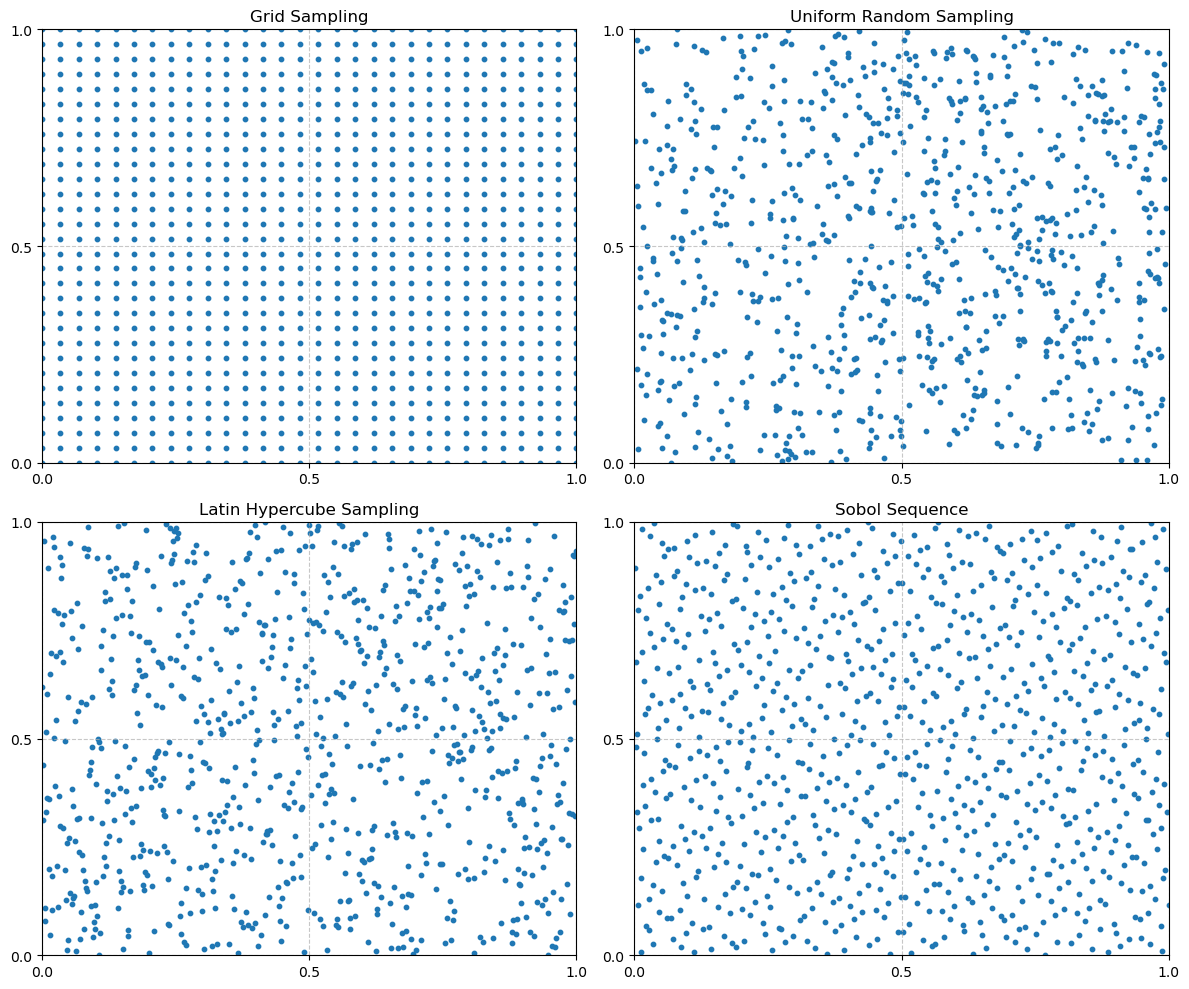

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import qmc
import math

# Set up the figure
plt.figure(figsize=(12, 10))

# Number of samples
n_samples = 900

# 1. Grid Sampling
grid_size = int(math.sqrt(n_samples))
x = np.linspace(0, 1, grid_size)
grid_x, grid_y = np.meshgrid(x, x)
grid_points = np.column_stack((grid_x.flatten(), grid_y.flatten()))[:n_samples]

plt.subplot(2, 2, 1)
plt.scatter(grid_points[:, 0], grid_points[:, 1], s=10)
plt.title('Grid Sampling')
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.xticks([0, 0.5, 1])
plt.yticks([0, 0.5, 1])
plt.grid(True, linestyle='--', alpha=0.7)

# 2. Uniform Random Sampling
random_points = np.random.rand(n_samples, 2)

plt.subplot(2, 2, 2)
plt.scatter(random_points[:, 0], random_points[:, 1], s=10)
plt.title('Uniform Random Sampling')
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.xticks([0, 0.5, 1])
plt.yticks([0, 0.5, 1])
plt.grid(True, linestyle='--', alpha=0.7)

# 3. Latin Hypercube Sampling
sampler = qmc.LatinHypercube(d=2, seed=42)
lhs_points = sampler.random(n=n_samples)

plt.subplot(2, 2, 3)
plt.scatter(lhs_points[:, 0], lhs_points[:, 1], s=10)
plt.title('Latin Hypercube Sampling')
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.xticks([0, 0.5, 1])
plt.yticks([0, 0.5, 1])
plt.grid(True, linestyle='--', alpha=0.7)

# 4. Sobol Sequence
sampler = qmc.Sobol(d=2, scramble=True, seed=42)
sobol_points = sampler.random(n=n_samples)

plt.subplot(2, 2, 4)
plt.scatter(sobol_points[:, 0], sobol_points[:, 1], s=10)
plt.title('Sobol Sequence')
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.xticks([0, 0.5, 1])
plt.yticks([0, 0.5, 1])
plt.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.savefig('sampling_methods.png', dpi=300)
plt.show()